In [1]:
import tensorflow as tf
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(x_train , y_train ) , (x_test , y_test ) = mnist.load_data()

the label is  5


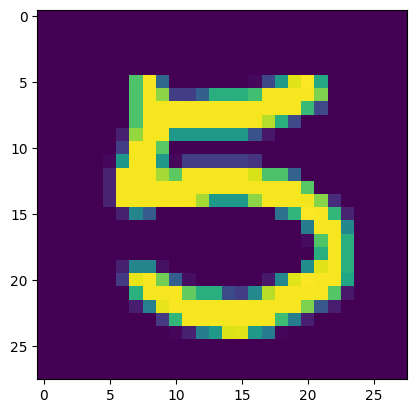

In [3]:
import random
idx = random.randint(1,x_train.shape[0] - 1 )
img2show , label = x_train[idx] , y_train[idx]
print("the label is " , label )
plt.imshow(img2show)

In [4]:
x_train , x_test = x_train.reshape(-1 , 28 * 28) , x_test.reshape(-1 , x_test.shape[1] * x_test.shape[2])
print("the test data shape " , x_test.shape  , "\n")
print("the train data shape " , x_train.shape , "\n")

the test data shape  (10000, 784) 

the train data shape  (60000, 784) 



In [5]:
x_train[0].shape

(784,)

In [6]:
y_train , y_test = tf.keras.utils.to_categorical(y_train , 10 ) , tf.keras.utils.to_categorical(y_test , 10 )
x_train , x_test = x_train / 255.0 , x_test / 255.0
y_train.shape

(60000, 10)

In [9]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD , Adam
model = Sequential()
model.add(Dense(784 , activation = "relu" , input_shape = (x_train.shape[1],)))
model.add(Dense(1000 , activation = "relu" ))
model.add(Dense(500 , activation= "relu"))
model.add(Dense(10 , activation = "softmax"))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 784)               615440    
                                                                 
 dense_7 (Dense)             (None, 1000)              785000    
                                                                 
 dense_8 (Dense)             (None, 500)               500500    
                                                                 
 dense_9 (Dense)             (None, 10)                5010      
                                                                 
Total params: 1905950 (7.27 MB)
Trainable params: 1905950 (7.27 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
model.compile(optimizer="SGD" , loss = "categorical_crossentropy" , metrics= ["accuracy"])

In [11]:
model.fit(x_train , y_train ,epochs= 10)

Epoch 1/10


1875/1875 [==============================] - 31s 14ms/step - loss: 0.5424 - accuracy: 0.8600
Epoch 2/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.2357 - accuracy: 0.9319
Epoch 3/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.1815 - accuracy: 0.9481
Epoch 4/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.1480 - accuracy: 0.9576
Epoch 5/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.1238 - accuracy: 0.9645
Epoch 6/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.1052 - accuracy: 0.9699
Epoch 7/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0912 - accuracy: 0.9740
Epoch 8/10
1875/1875 [==============================] - 25s 14ms/step - loss: 0.0794 - accuracy: 0.9775
Epoch 9/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0696 - accuracy: 0.9807
Epoch 10/10
1875/1875 [==============================] - 26s 1

In [12]:
idx_test = random.randint(0,x_test.shape[0] - 1)
img_test = x_test[idx_test]
img_test = np.expand_dims( img_test , axis = 0 )
prd_value = model.predict(img_test)
prd_label = np.argmax(prd_value)
print("the true label is : " , np.argmax(y_test[idx_test]) , "\n")
print("the predected value is : " , prd_label)

1/1 [==============================] - 0s 168ms/step
the true label is :  7 

the predected value is :  7


(10000, 784)